# Project 2: Ames Housing Sale Price Prediction
   ---
  *By Ethan Koh, 28 April 2020*

## Overview and Problem Set

The property market is not for the ill-informed. Housing prices can be cruelly volatile as they can get affected by multiple factors. Every buyer and seller of a house seek to equip with better knowledge to achieve a reasonable transaction price. Even though it's not possible for every contributing factor to be captured by our dataset, given the housing dataset in Ames, we are going to create a __regression model predicting the sale price of houses in Ames, Iowa__. In addition, we will be able to discover what are the main factors contributing to the price.

## Datasets

These datasets are provided by General Assembly for our course Kaggle competition. The dataset was prepared by Dean De Cock taken from the Ames, Iowa Assessor’s Office, originally used for tax assessment purpose. Data set contains information used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010.

The data by Dean De Cook has 2051 observations and 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers. However, data given by General Assembly has 81 columns, with 'Sale Condition' variable excluded, which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers.

- train.csv <br /> 
- test.csv <br />


## Data Dictionary

[LINK](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Assumptions and Limitations
Using multi-linear regression has it's own assumptions:<br />
Firstly, the predictors and target variable have an approximate linear relationship.<br />
Secondly, residuals are independent of each other, following a Normal distribution with mean 0 and have roughly equal variances.<br />
Thirdly, the predictors are independent of each other.<br />

In addition, there are limitations to predict future prices based on a 2006-2010 old dataset that we have. Many of the predictors for sale price may no longer be significant/relevant. Example, neighbouhood or street may have expanded.

## Table of Contents
- Import Libraries<br /> 
- Load Dataset<br />
- Data Cleaning: Missing Data <br /> <ul>
- Left 4 predictors with missing values
- Missing values actions to take 
- Filling missing values</ul>
- Exploratory Data Analysis<br /> <ul>
- Datatypes Correction
- Datatypes Correction
- Remove outliers
- Correlation
- Feature Selection</ul>
- Feature Engineering: Interaction terms
- Drop columns
- Data Conversion: String to integer
- Convert Categorie to Integers via get_dummies
- Model Prep
- Select Hyperparameters<ul>
- Lasso Regression
- Elastic Regression
- Refine Elastic Regression</ul>
- Baseline model
- Scaling
- Model Selection, Fitting and Evaluation
- Kaggle Submission

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV

%matplotlib inline

## Load Dataset

In [2]:
# There are 12 features(columns) with NA as a value with meaning
# Hence during import set defaul na as False

# Train dataset given
housing = pd.read_csv("../datasets/train.csv",keep_default_na=False)
# Test dataset given
housing_test = pd.read_csv("../datasets/test.csv",keep_default_na=False)

## Data Cleaning: Missing Data

In [3]:
#set option to view all columns
pd.set_option('display.max_columns', 250)
housing.head()

Id        PID  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL                  13517   Pave    NA   
1  544  531379050           60        RL           43     11492   Pave    NA   
2  153  535304180           20        RL           68      7922   Pave    NA   
3  318  916386060           60        RL           73      9802   Pave    NA   
4  255  906425045           50        RL           82     14235   Pave    NA   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace          289         Gd         TA     CBlock        TA   
1      BrkFace          132         Gd         TA      PConc        Gd   
2         None            0         TA         Gd     CBlock        TA   
3         None            0         TA         TA      PConc        Gd   
4         None            0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ          533            Unf   
1        TA            No            GLQ          637            Unf   
2        TA            No            GLQ          731            Unf   
3        TA            No            Unf            0            Unf   
4        Gd            No            Unf            0            Unf   

  BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Heating Heating QC Central Air  \
0            0         192           725    GasA         Ex           Y   
1            0         276           913    GasA         Ex           Y   
2            0         326          1057    GasA         TA           Y   
3            0         384           384    GasA         Gd           Y   
4            0         676           676    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

  Bsmt Full Bath Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0              0              0          2          1              3   
1              1              0          2          1              4   
2              1              0          1          0              3   
3              0              0          2          1              3   
4              0  

In [4]:
# check data shape
print(housing.shape)
housing_test.shape

(2051, 81)


(879, 80)

In [5]:
# replace real missing data with NaN
housing.replace('', np.nan,inplace=True)
housing_test.replace('', np.nan,inplace=True)

In [6]:
# check for nulls
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [7]:
# check for nulls
housing_test.isnull().sum()[housing_test.isnull().sum()>0]

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

In [8]:
### Deal with training set
# drop one of the identifier variable. no need to have 2 index
housing.drop('PID',axis=1,inplace=True)
print(housing.shape)
housing_test.drop('PID',axis=1,inplace=True)
housing_test.shape

(2051, 80)


(879, 79)

In [9]:
# random check whether it is the same null value in some of the predictors
housing[housing['BsmtFin SF 1'].isnull()]

Id  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
1327  1342           20        RM           99      5940   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1327       IR1          Lvl    AllPub        FR3        Gtl      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1327       Feedr        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1327             7        1946            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Mas Vnr Area Exter Qual  \
1327      MetalSd       CBlock         None            0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1327         TA      PConc       NaN       NaN           NaN            NaN   

     BsmtFin SF 1 BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF  \
1327          NaN            NaN          NaN         NaN           NaN   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1327    GasA         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area Bsmt Full Bath Bsmt Half Bath  Full Bath  \
1327                0          896            NaN            NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1327          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
1327        Typ           0           NA      Detchd          1946   

     Garage Finish Garage Cars Garage Area Garage Qual Garage Cond  \
1327           Unf           1         280          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1327           Y             0              0               0           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
1327             0          0      NA  MnPrv           NA         0        4   

      Yr Sold Sale Type  SalePrice  
1327     2008     ConLD      79000

In [10]:
housing[housing['Total Bsmt SF'].isnull()]
# it is the same ID having many nulls. id=1342. probably is completely missing at random. 

Id  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
1327  1342           20        RM           99      5940   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1327       IR1          Lvl    AllPub        FR3        Gtl      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1327       Feedr        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1327             7        1946            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Mas Vnr Area Exter Qual  \
1327      MetalSd       CBlock         None            0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1327         TA      PConc       NaN       NaN           NaN            NaN   

     BsmtFin SF 1 BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF  \
1327          NaN            NaN          NaN         NaN           NaN   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1327    GasA         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area Bsmt Full Bath Bsmt Half Bath  Full Bath  \
1327                0          896            NaN            NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1327          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
1327        Typ           0           NA      Detchd          1946   

     Garage Finish Garage Cars Garage Area Garage Qual Garage Cond  \
1327           Unf           1         280          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1327           Y             0              0               0           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
1327             0          0      NA  MnPrv           NA         0        4   

      Yr Sold Sale Type  SalePrice  
1327     2008     ConLD      79000

In [11]:
# remove index=1327
housing.drop(1327,inplace=True)

In [12]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [13]:
# random check whether it is the same null value in some of the predictors
housing[housing['Garage Cond'].isnull()]

Id  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
1712  2237           70        RM           50      9060   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1712       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1712        Norm        Norm      1Fam      2Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1712             6        1923            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Mas Vnr Area Exter Qual  \
1712      Wd Sdng      Plywood         None            0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

     BsmtFin SF 1 BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF  \
1712          548            Unf            0         311           859   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1712    GasA         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area Bsmt Full Bath Bsmt Half Bath  Full Bath  \
1712                0         1828              0              0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1712          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
1712        Typ           0           NA      Detchd           NaN   

     Garage Finish Garage Cars Garage Area Garage Qual Garage Cond  \
1712           NaN         NaN         NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1712           Y           174              0             212           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
1712             0          0      NA  MnPrv           NA         0        3   

      Yr Sold Sale Type  SalePrice  
1712     2007       WD      150909

In [14]:
housing[housing['Garage Qual'].isnull()]
# it is the same ID having many nulls. index=1712. probably is missing completely at random (MCAR). 

Id  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
1712  2237           70        RM           50      9060   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1712       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1712        Norm        Norm      1Fam      2Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1712             6        1923            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Mas Vnr Area Exter Qual  \
1712      Wd Sdng      Plywood         None            0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

     BsmtFin SF 1 BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF  \
1712          548            Unf            0         311           859   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1712    GasA         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area Bsmt Full Bath Bsmt Half Bath  Full Bath  \
1712                0         1828              0              0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1712          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
1712        Typ           0           NA      Detchd           NaN   

     Garage Finish Garage Cars Garage Area Garage Qual Garage Cond  \
1712           NaN         NaN         NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1712           Y           174              0             212           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
1712             0          0      NA  MnPrv           NA         0        3   

      Yr Sold Sale Type  SalePrice  
1712     2007       WD      150909

In [15]:
# remove index=1712
housing.drop(1712,inplace=True)

In [16]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     113
dtype: int64

In [17]:
# check shape
housing.shape

(2049, 80)

In [18]:
# just drop those with small missing values seems most likely is completely missing at random
housing.dropna(subset=['Bsmt Exposure','BsmtFin Type 2','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

In [19]:
# check shape
housing.shape
# 5 rows dropped

(2044, 80)

In [20]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

### Left 4 predictors with missing values
Let's investigate further

In [21]:
housing.loc[housing['Lot Frontage'].isnull(),:]
# only that specific column have missing values. 
# other columns seems to not have missing values, suggesting not missing at random(NMAR) or missing at random(MAR).
# I believe it's merely due to lack of this information by sellers or buyers instead hence filled as Null.

Id  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0      109           60        RL          NaN     13517   Pave    NA   
7      145           20        RL          NaN     12160   Pave    NA   
8     1942           20        RL          NaN     15783   Pave    NA   
23      12           20        RL          NaN      7980   Pave    NA   
27    1534           50        RL          NaN     11700   Pave  Grvl   
...    ...          ...       ...          ...       ...    ...   ...   
2016   560           20        RL          NaN      7791   Pave    NA   
2022  2872           20        RL          NaN     16381   Pave    NA   
2028  2526           20        RL          NaN     20781   Pave    NA   
2031    25           20        RL          NaN     12537   Pave    NA   
2047   785           30        RL          NaN     12342   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
7          IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8          Reg          Lvl    AllPub     Inside        Gtl      OldTown   
23         IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
27         IR1          HLS    AllPub     Inside        Mod      Crawfor   
...        ...          ...       ...        ...        ...          ...   
2016       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2022       IR1          Lvl    AllPub     Inside        Gtl      Crawfor   
2028       IR2          Lvl    AllPub    CulDSac        Gtl       NWAmes   
2031       IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   
2047       IR1          Lvl    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           RRAe        Norm      1Fam      2Story             6   
7           Norm        Norm      1Fam      1Story             5   
8         Artery        Norm      1Fam      1Story             5   
23          Norm        Norm      1Fam      1Story             6   
27          Norm        Norm      1Fam      1.5Fin             5   
...          ...         ...       ...         ...           ...   
2016        RRAe        Norm      1Fam      1Story             5   
2022        Norm        Norm      1Fam      1Story             6   
2028        PosN        Norm      1Fam      1Story             7   
2031        Norm        Norm      1Fam      1Story             5   
2047        Norm        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
7                5        1959            1959        Hip   CompShg   
8                5        1952            1952      Gable   CompShg   
23               7        1992            2007      Gable   CompShg   
27               6        1937            1995      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2016             8        1963            1995      Gable   CompShg   
2022             5        1969            1969      Gable   CompShg   
2028             7        1968            2003        Hip   CompShg   
2031             6        1971            2008      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace          289         Gd   
7         Plywood      Plywood      BrkFace          180         TA   
8         Wd Sdng      Wd Sdng         None            0         TA   
23        HdBoard      HdBoard         None            0         TA   
27        WdShing      Wd Shng         None            0         TA   
...           ...          ...          ...          ...        ...   
2016      Plywood      Plywood         None        

In [22]:
# temporary drop the nulls
housing_temp = housing.dropna()
# create a temporary dataframe with just the 4 predictors of concern
housing_temp = housing_temp.loc[:,['Lot Frontage','Mas Vnr Type','Mas Vnr Area','Garage Yr Blt']]
housing_temp.head()

Lot Frontage Mas Vnr Type Mas Vnr Area Garage Yr Blt
1           43      BrkFace          132          1997
2           68         None            0          1953
3           73         None            0          2007
4           82         None            0          1957
5          137         None            0          1966

In [23]:
# correct the datatype
housing_temp['Lot Frontage'] = housing_temp['Lot Frontage'].astype(int)
housing_temp['Mas Vnr Area'] = housing_temp['Mas Vnr Area'].astype(int)
housing_temp['Garage Yr Blt'] = housing_temp['Garage Yr Blt'].astype(int)
housing_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 1 to 2050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Lot Frontage   1592 non-null   int64 
 1   Mas Vnr Type   1592 non-null   object
 2   Mas Vnr Area   1592 non-null   int64 
 3   Garage Yr Blt  1592 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.2+ KB


In [24]:
# Explore summary statistics
housing_temp.describe()
# For Lot Frontage, the standard deviation is 1/3 of the mean. 75th percentile is low compared to the maximum 313 suggesting there are outliers 
# I think it is reasonable to use the median 69 to replace null values for Lot Frontage

# For Mas Vnr Area, it seems that majority is zero. Shall explore using boxplot below.

# For Garage Yr Blt, year range is from 1895 to 2010 with mean at 1978. Standard deviation is low at 25 years. 
# Suggest fitting the missing values with the mean

Lot Frontage  Mas Vnr Area  Garage Yr Blt
count   1592.000000   1592.000000     1592.00000
mean      69.474246    102.198492     1978.08103
std       23.263432    179.991576       25.97887
min       21.000000      0.000000     1895.00000
25%       59.000000      0.000000     1959.00000
50%       69.000000      0.000000     1980.00000
75%       80.000000    163.250000     2003.00000
max      313.000000   1600.000000     2010.00000

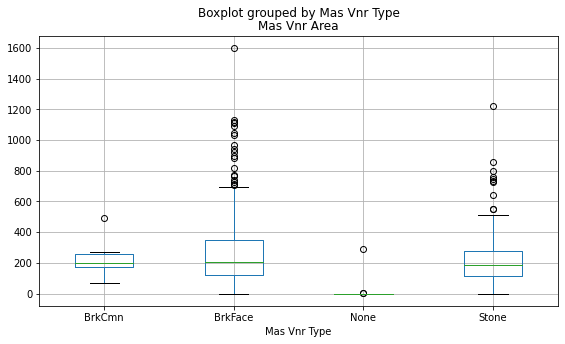

In [25]:
housing_temp.boxplot('Mas Vnr Area',by='Mas Vnr Type',figsize=(9,5));
# Those that have 'None' as Mas Vnr Type should have Mas Vnr Area as 0
# Others Mas Vnr Type have roughly similar median with more outliers from BrkFace. 
# So should fit Mas Vnr Area's missing values with their respective median

In [26]:
# Look at proportion in Mas Vnr Type
housing_temp['Mas Vnr Type'].value_counts()
# Mostly is 'None'. Suggest filling the 22 values with 'None' since it's not a lot of missing values.

None       955
BrkFace    473
Stone      156
BrkCmn       8
Name: Mas Vnr Type, dtype: int64

In [27]:
# for test set
housing['Garage Finish'].value_counts(normalize=True)
# since majority is Unf, for just 1 missing value will put as Unf

Unf    0.413894
RFn    0.281800
Fin    0.249022
NA     0.055284
Name: Garage Finish, dtype: float64

In [28]:
housing['Electrical'].value_counts(normalize=True)
# since majority SBrkr, for just 1 NA will put as SBrkr

SBrkr    0.910959
FuseA    0.068004
FuseF    0.017123
FuseP    0.003425
Mix      0.000489
Name: Electrical, dtype: float64

### Missing values actions to take:
- 'Mas Vnr Type': Filling the 22 missing values as 'None'.
- 'Lot Frontage': Fill the 330 missing values with median value 69.
- 'Mas Vnr Area': For those with 'None' for 'Mas Vnr Type', fill as 0. 
   Others fill with their respective Mas Vnr Type Median
   Since those missing at Mas Vnr Area is same as Mas Vnr Type, so will fill those as 0.
- 'Garage Yr Blt': Filling the 113 missing values with mean year 1978.
- 'Garage Finish' (for test set): Fill missing value with Unf
- 'Eletrical' (for test set): Fill missing value with SBrkr

## Filling missing values

In [29]:
housing['Lot Frontage'].fillna(69, inplace=True)
housing_test['Lot Frontage'].fillna(69, inplace=True)

In [30]:
housing['Garage Yr Blt'].fillna(1978, inplace=True)
housing_test['Garage Yr Blt'].fillna(1978, inplace=True)

In [31]:
housing['Mas Vnr Type'].fillna('None', inplace=True)
housing_test['Mas Vnr Type'].fillna('None', inplace=True)

In [32]:
housing['Mas Vnr Area'].fillna(0, inplace=True)
housing_test['Mas Vnr Area'].fillna(0, inplace=True)

In [33]:
housing_test['Garage Finish'].fillna('Unf', inplace=True)
housing_test['Electrical'].fillna('SBrkr', inplace=True)


In [34]:
# casual checking
housing_test['Mas Vnr Type'].value_counts()

None       535
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [35]:
housing_test['Electrical'].value_counts()

SBrkr    815
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [36]:
# check for nulls again
print(housing.isnull().sum()[housing.isnull().sum()>0])
housing_test.isnull().sum()[housing_test.isnull().sum()>0]
# no more missing values

Series([], dtype: int64)


Series([], dtype: int64)

In [37]:
# Final number of rows and columns
print(housing.shape)
# 2044 observations, 78 predictors, 1 target, 1 index
print(housing_test.shape)
# 879 observations, 77 predictors, 1 target, 1 index


(2044, 80)
(879, 79)


## Exploratory Data Analysis

### Datatypes Correction

In [38]:
# convert datatype to correct ones
housing['Lot Frontage'] = housing['Lot Frontage'].astype(int)
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].astype(int)
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].astype(int)
housing['MS SubClass'] = housing['MS SubClass'].astype(str)

housing_test['Lot Frontage'] = housing_test['Lot Frontage'].astype(int)
housing_test['Mas Vnr Area'] = housing_test['Mas Vnr Area'].astype(int)
housing_test['Garage Yr Blt'] = housing_test['Garage Yr Blt'].astype(int)
housing_test['MS SubClass'] = housing_test['MS SubClass'].astype(str)

In [39]:
# Look at data to check datatype
housing.head()

Id MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0  109          60        RL            69     13517   Pave    NA       IR1   
1  544          60        RL            43     11492   Pave    NA       IR1   
2  153          20        RL            68      7922   Pave    NA       Reg   
3  318          60        RL            73      9802   Pave    NA       Reg   
4  255          50        RL            82     14235   Pave    NA       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0           289         Gd         TA     CBlock        TA        TA   
1           132         Gd         TA      PConc        Gd        TA   
2             0         TA         Gd     CBlock        TA        TA   
3             0         TA         TA      PConc        Gd        TA   
4             0         TA         TA      PConc        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1 BsmtFin Type 2 BsmtFin SF 2  \
0            No            GLQ          533            Unf            0   
1            No            GLQ          637            Unf            0   
2            No            GLQ          731            Unf            0   
3            No            Unf            0            Unf            0   
4            No            Unf            0            Unf            0   

  Bsmt Unf SF Total Bsmt SF Heating Heating QC Central Air Electrical  \
0         192           725    GasA         Ex           Y      SBrkr   
1         276           913    GasA         Ex           Y      SBrkr   
2         326          1057    GasA         TA           Y      SBrkr   
3         384           384    GasA         Gd           Y      SBrkr   
4         676           676    GasA         TA           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area Bsmt Full Bath  \
0         725         754                0         1479              0   
1         913        1209                0         2122              1   
2        1057           0                0         1057              1   
3         744         700                0         1444              0   
4         831         614                0         1445              0   

  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0              0          2          1              3              1   
1              0          2          1              4              1   
2              0          1          0              3              1   
3              0          2          1              3       

In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2044 non-null   int64 
 1   MS SubClass      2044 non-null   object
 2   MS Zoning        2044 non-null   object
 3   Lot Frontage     2044 non-null   int64 
 4   Lot Area         2044 non-null   int64 
 5   Street           2044 non-null   object
 6   Alley            2044 non-null   object
 7   Lot Shape        2044 non-null   object
 8   Land Contour     2044 non-null   object
 9   Utilities        2044 non-null   object
 10  Lot Config       2044 non-null   object
 11  Land Slope       2044 non-null   object
 12  Neighborhood     2044 non-null   object
 13  Condition 1      2044 non-null   object
 14  Condition 2      2044 non-null   object
 15  Bldg Type        2044 non-null   object
 16  House Style      2044 non-null   object
 17  Overall Qual     2044 non-null   

In [41]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               879 non-null    int64 
 1   MS SubClass      879 non-null    object
 2   MS Zoning        879 non-null    object
 3   Lot Frontage     879 non-null    int64 
 4   Lot Area         879 non-null    int64 
 5   Street           879 non-null    object
 6   Alley            879 non-null    object
 7   Lot Shape        879 non-null    object
 8   Land Contour     879 non-null    object
 9   Utilities        879 non-null    object
 10  Lot Config       879 non-null    object
 11  Land Slope       879 non-null    object
 12  Neighborhood     879 non-null    object
 13  Condition 1      879 non-null    object
 14  Condition 2      879 non-null    object
 15  Bldg Type        879 non-null    object
 16  House Style      879 non-null    object
 17  Overall Qual     879 non-null    in

After investigating, the following variables are wrongly classified:
- BsmtFin SF 1
- BsmtFin SF 2
- Bsmt Unf SF    
- Total Bsmt SF 
- Bsmt Full Bath   
- Bsmt Half Bath
- Garage Cars   
- Garage Area

All of these should be integer instead of string. So let's correct them.

In [42]:
# checked the values within these variables for typos
# Won't display the result
# np.unique(housing['Garage Area'])

In [43]:
wrong_col = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']
# convert the above mentioned columns to integer
housing[wrong_col] = housing[wrong_col].astype(int)

In [44]:
# check datatype corrected
housing.loc[:,wrong_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   BsmtFin SF 1    2044 non-null   int64
 1   BsmtFin SF 2    2044 non-null   int64
 2   Bsmt Unf SF     2044 non-null   int64
 3   Total Bsmt SF   2044 non-null   int64
 4   Bsmt Full Bath  2044 non-null   int64
 5   Bsmt Half Bath  2044 non-null   int64
 6   Garage Cars     2044 non-null   int64
 7   Garage Area     2044 non-null   int64
dtypes: int64(8)
memory usage: 143.7 KB


### Remove outliers

Remmoving abnormal sales will improve prediction for sale prices. The abnormal sales can arise from exceptional high value sales or unusually areas size. So I want to remove at least certain extreme outliers.
Taking a look at some Areas vs Sale prices:
- Lot Area
- Garage Area
- Pool Area
- Gr Liv Area
- 1st Flr SF
- Low Qual Fin SF
- Sale price

In [45]:
# Variables to investigate
investigate_col = ['Lot Area','Garage Area','Pool Area','Gr Liv Area','1st Flr SF','Low Qual Fin SF']

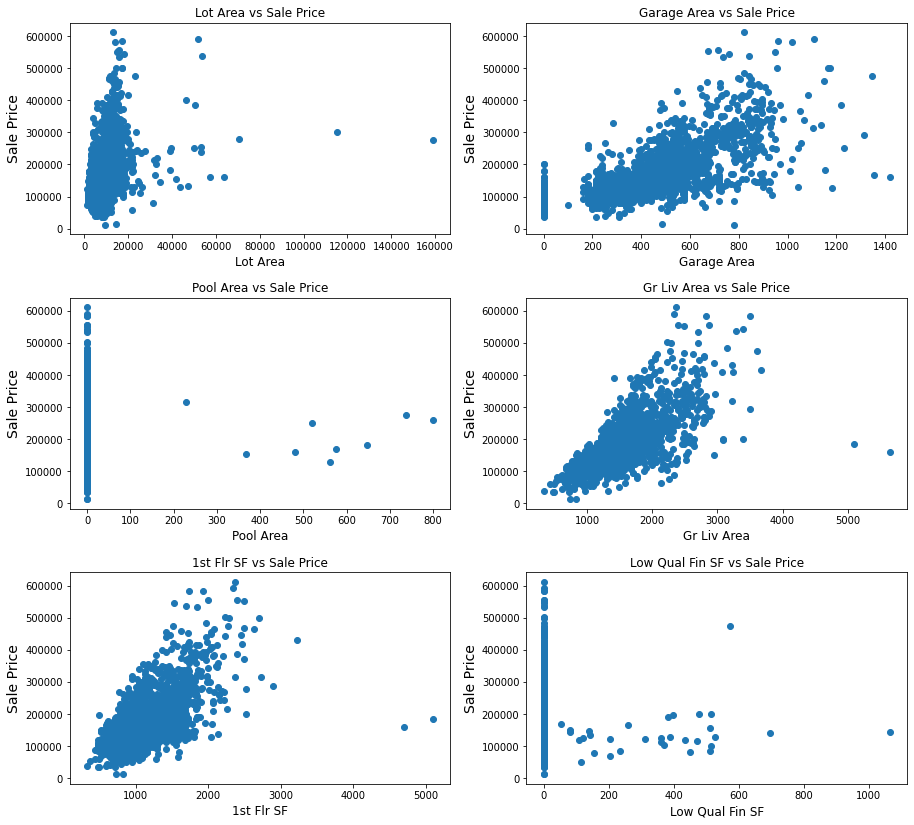

In [46]:
# Scatterplot of variables of interest

#Alternative simple plot
#fig, axes = plt.subplots(3,2, figsize=(14,12))
#for i in range(6):
#    housing.plot(kind='scatter',x=investigate_col[i],y='SalePrice',ax=axes.flatten()[i])

fig, axes = plt.subplots(3,2, figsize=(15,14))
for i in range(6):
    axes.flatten()[i].scatter(housing[investigate_col[i]],housing['SalePrice'])
    axes.flatten()[i].set_xlabel(investigate_col[i],fontsize=12)
    axes.flatten()[i].set_ylabel('Sale Price',fontsize=14)
    axes.flatten()[i].set_title(str(investigate_col[i])+" vs Sale Price")
    
plt.subplots_adjust(hspace=0.3)

Notice 2 obvious outliers for '1st Flr SF', 'Gr Liv Area' and 'Lot Area'. 
Notice 3 obvious outliers for 'Low Qual Fin SF'.
Notice only 9 non-zero 'Pool Area' out of 2044 observations. Do not forsee it will be a main predictor.

'1st Fir SF', 'Gr Liv Area' and 'Garage Area' have some linear relatioship with 'SalePrice', suggesting they could be important predictors.

In [47]:
# Drop 2 observations with unusually high 'Gr Liv Area'
housing.drop(housing[housing['Gr Liv Area']>4000].index,axis=0,inplace=True)

In [48]:
# find the 3 largest 'Low Qual Fin SF'
housing[housing['Low Qual Fin SF']>550]

Id MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
828    661          50        RL            60     10410   Pave  Grvl   
1035  2667          75        RM            90     22950   Pave    NA   
1239  1362          50        RM            60      6876   Pave    NA   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
828        Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1035       IR2          Lvl    AllPub     Inside        Gtl      OldTown   
1239       Reg          Bnk    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
828         Norm        Norm      1Fam      1.5Fin             4   
1035      Artery        Norm      1Fam      2.5Fin            10   
1239        Norm        Norm      1Fam      1.5Fin             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
828              5        1915            1950      Gable   CompShg   
1035             9        1892            1993      Gable   WdShngl   
1239             6        1938            1958      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
828       MetalSd      MetalSd         None             0         TA   
1035      Wd Sdng      Wd Sdng         None             0         Gd   
1239      Wd Sdng      Wd Sdng         None             0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
828          TA     BrkTil        TA        TA            No            Unf   
1035         Gd     BrkTil        TA        TA            Mn            Unf   
1239         TA     BrkTil        TA        TA            No            Unf   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
828              0            Unf             0         1313           1313   
1035             0            Unf             0         1107           1107   
1239             0            Unf             0         1272           1272   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
828     GasA         TA           Y      SBrkr        1313           0   
1035    GasA         Ex           Y      SBrkr        1518        1518   
1239    GasA         TA           Y      SBrkr        1272           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
828              1064         2377               0               0          2   
1035              572         3608               0               0          2   
1239              697         1969               0               0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
828           0              3              1           Gd              8   
1035          1              4              1           Ex             12   
1239          0              4              1           TA              9   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
828        Min2           1           TA      Detchd           1954   
1035        Typ           2           TA      Detchd           1993   
1239       Min1           1           Gd      Detchd           1938   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
828            Unf            2          528          TA          TA   
1035           Unf            3          840          Ex          TA   
1239           Unf            2          400          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
828            Y             0              0             432           0   
1035           Y             0            260               0           0   
1239           Y             0             34               0           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
828              0          0      

In [49]:
# Drop 3 observations with unusually high 'Low Qual Fin SF'
housing.drop(housing[housing['Low Qual Fin SF']>550].index,axis=0,inplace=True)

In [50]:
# check if Lot Area already dropped 
housing[housing['Lot Area']>100_000] # Not yet

Id MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
471  2116          50        RL            69    159000   Pave    NA   
694  2072          20        RL            69    115149   Pave    NA   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
471       IR2          Low    AllPub    CulDSac        Sev      ClearCr   
694       IR2          Low    AllPub    CulDSac        Sev      ClearCr   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
471        Norm        Norm      1Fam      1.5Fin             6             7   
694        Norm        Norm      1Fam      1Story             7             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
471        1958            2006      Gable   CompShg      Wd Sdng   
694        1971            2002      Gable   CompShg      Plywood   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
471      HdBoard       BrkCmn           472         Gd         TA     CBlock   
694      Plywood        Stone           351         TA         TA     CBlock   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
471        Gd        TA            Gd            Rec           697   
694        Gd        TA            Gd            GLQ          1219   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
471            Unf             0          747           1444    GasA   
694            Unf             0          424           1643    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
471         Gd           Y      SBrkr        1444         700   
694         TA           Y      SBrkr        1824           0   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
471                0         2144               0               1          2   
694                0         1824               1               0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
471          0              4              1           Gd              7   
694          0              2              1           Gd              5   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
471        Typ           2           TA      Attchd           1958   
694        Typ           2           TA      Attchd           1971   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
471           Fin            2          389          TA          TA   
694           Unf            2          739          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
471           Y             0             98               0           0   
694           Y           380             48               0           0   

     Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
471             0          0      NA    NA         Shed       500        6   
694             0          0      NA    NA           NA         0        6   

     Yr Sold Sale Type  SalePrice  
471     2007       WD      277000  
694     2007       WD      302000

In [51]:
# Drop 2 observations with unusually high 'Lot Area'
housing.drop(housing[housing['Lot Area']>100_000].index,axis=0,inplace=True)

In [52]:
# check if 1st Flr SF already dropped 
housing[housing['1st Flr SF']>4000] # Dropped already

Empty DataFrame
Columns: [Id, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

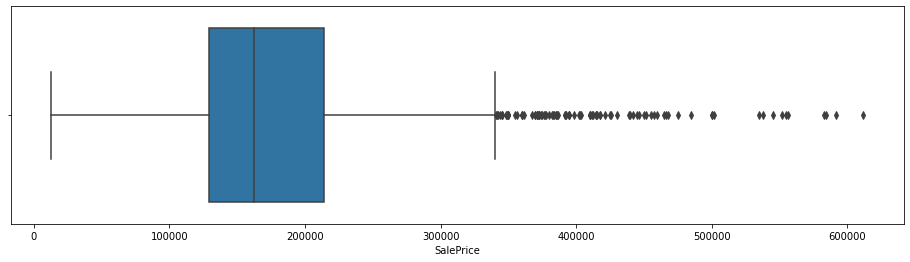

In [53]:
# Boxplot of Sale Price
# no exceptionally big outliers to remove
plt.figure(figsize=(16,4))
sns.boxplot(housing['SalePrice']);

### Correlation

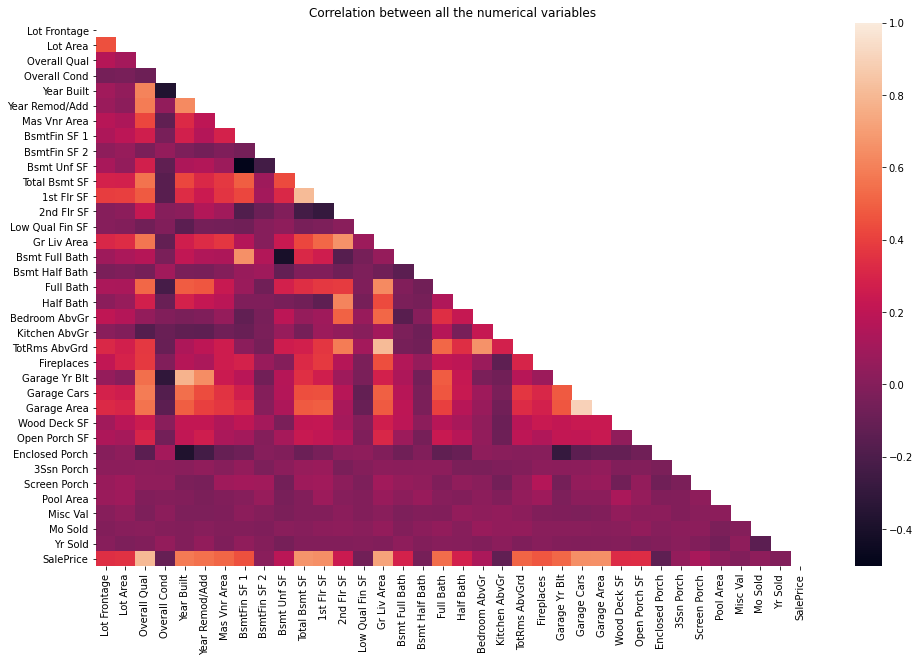

In [54]:
# Establish size of figure.
plt.figure(figsize=(16,10))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(housing.corr().iloc[1:,1:])
mask[np.triu_indices_from(mask)] = True

sns.heatmap(housing.corr().iloc[1:,1:], mask=mask).set(title="Correlation between all the numerical variables");

There are 6 obvious slight negatively correlated variables (~-0.4) such as:
- Overall Cond vs Year Built 
- Overall Cond vs Garage Yr Blt
- Bsmt Full Bath vs Bsmt Unf SF
- Bsmt Unf SF vs BsmtFin SF 1
- Enclosed Porch vs Year Built
- Enclosed Porch vs Garage Yr Blt

There are 2 obvious highly positively correlated variables (~ 0.9) such as:
- TotRms AbvGrd vs Gr Liv Area
- Garage Area vs Garage Cars

For these variables, I will like to __create interaction term for them later__.

Overall, I also don't see any meaningless variables in relationship with Sale Price to drop them.
However, for TotRms AbvGrd, Gr Liv Area, Garage Area and Garage Cars, I should drop two of them due to high correlation with each other, breaking the multi linear regression assumption. Earlier I discovered that Garage Area is likely a good predictor for SalePrice based on scatterplot. Based on above correlation heatmap, I can deduce that Garage Cars is of similar correlation coefficient with Garage Area to SalePrice. 

Looking at the meaning, Garage Cars is size of garage in car capacity while Garage Area is size of garage in square feet. Hence, there is not much reason to keep both. Shall keep the more accurate measurement which is Garage Area and __drop Garage Cars__.

Let's investigate for TotRms AbvGrd and Gr Liv Area now.

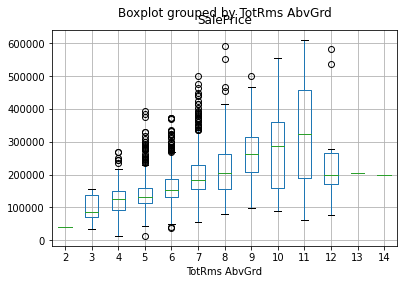

In [55]:
# Plot scatterplot for TotRms AbvGrd with Sale Price
housing.boxplot(column='SalePrice',by='TotRms AbvGrd');

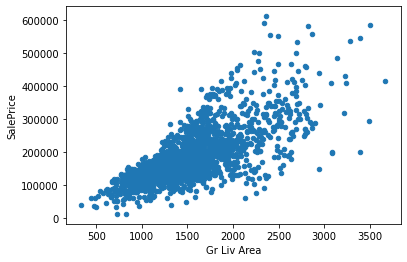

In [56]:
# Plot scatterplot for Gr Liv Area with Sale Price
housing.plot(kind='scatter',x='Gr Liv Area',y= 'SalePrice');

Both have convincing relationship with SalePrice. Looking at the correlation heatmap earlier, I have decide to __drop TotRms AbvGrd__ instead.

In [57]:
# Take a look at correlation with Sale Price
housing.corr().iloc[:,-1].sort_values()

Enclosed Porch    -0.134679
Kitchen AbvGr     -0.125471
Overall Cond      -0.103504
Low Qual Fin SF   -0.066843
Id                -0.054623
Bsmt Half Bath    -0.047419
Yr Sold           -0.012694
Misc Val          -0.010705
BsmtFin SF 2       0.015735
Pool Area          0.026173
Mo Sold            0.031814
3Ssn Porch         0.049380
Screen Porch       0.124858
Bedroom AbvGr      0.134051
Bsmt Unf SF        0.189326
2nd Flr SF         0.246541
Half Bath          0.283330
Bsmt Full Bath     0.287046
Wood Deck SF       0.330674
Open Porch SF      0.334118
Lot Frontage       0.338306
Lot Area           0.348839
BsmtFin SF 1       0.449446
Fireplaces         0.470020
TotRms AbvGrd      0.507771
Mas Vnr Area       0.513072
Garage Yr Blt      0.520741
Full Bath          0.538504
Year Remod/Add     0.550795
Year Built         0.581161
Garage Cars        0.648401
1st Flr SF         0.652384
Garage Area        0.654813
Total Bsmt SF      0.671185
Gr Liv Area        0.720082
Overall Qual       0

Misc Val, BsmtFin SF 2 and Pool Area have little linear relationship with Sale Price. Earlier already concluded Pool Area will not be a good predictor.
Let's plot to take a look.

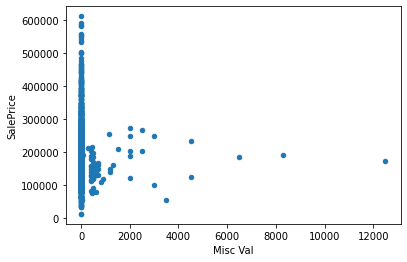

In [58]:
housing.plot(kind='scatter',x='Misc Val',y= 'SalePrice');

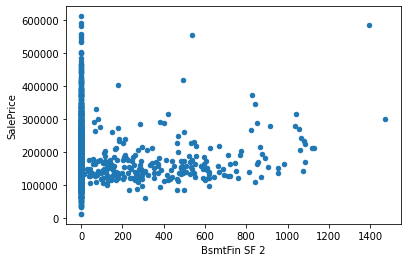

In [59]:
housing.plot(kind='scatter',x='BsmtFin SF 2',y= 'SalePrice');

Looking at the plot, I have decide to __drop 'Pool Area' and 'Misc Val'__ variable to be possible predictors.
I also decide to __drop 'Pool QC'__ since Pool Area and Pool QC should be hand-in-hand as predictors. 

### Feature Selection

After investigating the numerical variables in terms of their qualitative meaning, I have selected these few that I suspect may be the main predictors to execute feature engineering:

Set 1:
- Overall Qual
- Overall Cond
- 1st Flr SF 
- 2nd Flr SF 
- Low Qual Fin SF 
- Gr Liv Area 

Set 2:
- Bsmt Full Bath 
- Bsmt Half Bath
- Full Bath
- Half Bath 
- Bedroom AbvGr
- Kitchen AbvGr

I would like to __create higher polynomial of 2 and interaction terms for these, in addition to those mentioned above__.

## Feature Engineering: Interaction terms

In [60]:
# Create interaction terms for those with negative correlation mentioned earlier
housing['OverallCond-YearBuilt'] = housing['Overall Cond'] * housing['Year Built']
housing['OverallCond-GarageYrBlt'] = housing['Overall Cond'] * housing['Garage Yr Blt']
housing['BsmtFullBath-BsmtUnfSF'] = housing['Bsmt Full Bath'] * housing['Bsmt Unf SF']
housing['BsmtUnfSF-BsmtFinSF1'] = housing['Bsmt Unf SF'] * housing['BsmtFin SF 1']
housing['EnclosedPorch-YearBuilt'] = housing['Enclosed Porch'] * housing['Year Built']
housing['EnclosedPorch-GarageYrBlt'] = housing['Enclosed Porch'] * housing['Garage Yr Blt']

housing_test['OverallCond-YearBuilt'] = housing_test['Overall Cond'] * housing_test['Year Built']
housing_test['OverallCond-GarageYrBlt'] = housing_test['Overall Cond'] * housing_test['Garage Yr Blt']
housing_test['BsmtFullBath-BsmtUnfSF'] = housing_test['Bsmt Full Bath'] * housing_test['Bsmt Unf SF']
housing_test['BsmtUnfSF-BsmtFinSF1'] = housing_test['Bsmt Unf SF'] * housing_test['BsmtFin SF 1']
housing_test['EnclosedPorch-YearBuilt'] = housing_test['Enclosed Porch'] * housing_test['Year Built']
housing_test['EnclosedPorch-GarageYrBlt'] = housing_test['Enclosed Porch'] * housing_test['Garage Yr Blt']

In [61]:
# check shape from 80 columns to 86
print(housing.shape)
# check shape from 79 columns to 85
housing_test.shape

(2037, 86)


(879, 85)

In [62]:
# Create 2 sets list
set_1 = ['Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']
set_2 = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr']
X_set_1 = housing[set_1]
X_set_2 = housing[set_2]
X_set_1_test = housing_test[set_1]
X_set_2_test = housing_test[set_2]

In [63]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)

# Create interaction terms and polynomial features for those selected earlier
poly_set_1 = poly.fit_transform(X_set_1)
poly_set_2 = poly.fit_transform(X_set_2)
poly_set_1_test = poly.fit_transform(X_set_1_test)
poly_set_2_test = poly.fit_transform(X_set_2_test)

In [64]:
# View polynomial features set 1 in a DataFrame for training dataset
X_poly_1 = pd.DataFrame(poly_set_1,columns=poly.get_feature_names(set_1))
X_poly_1.head()

Overall Qual  Overall Cond  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0           6.0           8.0       725.0       754.0              0.0   
1           7.0           5.0       913.0      1209.0              0.0   
2           5.0           7.0      1057.0         0.0              0.0   
3           5.0           5.0       744.0       700.0              0.0   
4           6.0           8.0       831.0       614.0              0.0   

   Gr Liv Area  Overall Qual^2  Overall Qual Overall Cond  \
0       1479.0            36.0                       48.0   
1       2122.0            49.0                       35.0   
2       1057.0            25.0                       35.0   
3       1444.0            25.0                       25.0   
4       1445.0            36.0                       48.0   

   Overall Qual 1st Flr SF  Overall Qual 2nd Flr SF  \
0                   4350.0                   4524.0   
1                   6391.0                   8463.0   
2                   5285.0                      0.0   
3                   3720.0                   3500.0   
4                   4986.0                   3684.0   

   Overall Qual Low Qual Fin SF  Overall Qual Gr Liv Area  Overall Cond^2  \
0                           0.0                    8874.0            64.0   
1                           0.0                   14854.0            25.0   
2                           0.0                    5285.0            49.0   
3                           0.0                    7220.0            25.0   
4                           0.0                    8670.0            64.0   

   Overall Cond 1st Flr SF  Overall Cond 2nd Flr SF  \
0                   5800.0                   6032.0   
1                   4565.0                   6045.0   
2                   7399.0                      0.0   
3                   3720.0                   3500.0   
4                   6648.0                   4912.0   

   Overall Cond Low Qual Fin SF  Overall Cond Gr Liv Area  1st Flr SF^2  \
0                           0.0                   11832.0      525625.0   
1                           0.0                   10610.0      833569.0   
2                           0.0                    7399.0     1117249.0   
3                           0.0                    7220.0      553536.0   
4                           0.0                   11560.0      690561.0   

   1st Flr SF 2nd Flr SF  1st Flr SF Low Qual Fin SF  1st Flr SF Gr Liv Area  \
0               546650.0                         0.0               1072275.0   
1              1103817.0                         0.0               1937386.0   
2                    0.0                         0.0               1117249.0   
3               520800.0                         0.0               1074336.0   
4               510234.0                         0.0               1200795.0   

   2nd Flr SF^2  2nd Flr SF Low Qual Fin SF  2nd Flr SF Gr Liv Area  \
0      568516.0                         0.0               1115166.0   
1     1461681.0                         0.0               2565498.0   
2           0.0                         0.0                     0.0   
3      490000.0                         0.0               1010800.0   
4      376996.0                         0.0                887230.0   

   Low Qual Fin SF^2  Low Qual Fin SF Gr Liv Area  Gr Liv Area^2  
0                0.0                          0.0      2187441.0  
1                0.0                          0.0      4502884.0  
2                0.0                          0.0      1117249.0  
3                0.0                          0.0      2085136.0  
4                0.0                          0.0      2088025.0

In [65]:
# View polynomial features set 1 in a DataFrame for testing dataset
X_poly_1_test = pd.DataFrame(poly_set_1_test,columns=poly.get_feature_names(set_1))
X_poly_1_test.shape

(879, 27)

In [66]:
# View polynomial features set 2 in a DataFrame for training dataset
X_poly_2 = pd.DataFrame(poly_set_2,columns=poly.get_feature_names(set_2))
X_poly_2.head()

Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0        2.0        1.0            3.0   
1             1.0             0.0        2.0        1.0            4.0   
2             1.0             0.0        1.0        0.0            3.0   
3             0.0             0.0        2.0        1.0            3.0   
4             0.0             0.0        2.0        0.0            3.0   

   Kitchen AbvGr  Bsmt Full Bath^2  Bsmt Full Bath Bsmt Half Bath  \
0            1.0               0.0                            0.0   
1            1.0               1.0                            0.0   
2            1.0               1.0                            0.0   
3            1.0               0.0                            0.0   
4            1.0               0.0                            0.0   

   Bsmt Full Bath Full Bath  Bsmt Full Bath Half Bath  \
0                       0.0                       0.0   
1                       2.0                       1.0   
2                       1.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Bsmt Full Bath Bedroom AbvGr  Bsmt Full Bath Kitchen AbvGr  \
0                           0.0                           0.0   
1                           4.0                           1.0   
2                           3.0                           1.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Bsmt Half Bath^2  Bsmt Half Bath Full Bath  Bsmt Half Bath Half Bath  \
0               0.0                       0.0                       0.0   
1               0.0                       0.0                       0.0   
2               0.0                       0.0                       0.0   
3               0.0                       0.0                       0.0   
4               0.0                       0.0                       0.0   

   Bsmt Half Bath Bedroom AbvGr  Bsmt Half Bath Kitchen AbvGr  Full Bath^2  \
0                           0.0                           0.0          4.0   
1                           0.0                           0.0          4.0   
2                           0.0                           0.0          1.0   
3                           0.0                           0.0          4.0   
4                           0.0                           0.0          4.0   

   Full Bath Half Bath  Full Bath Bedroom AbvGr  Full Bath Kitchen AbvGr  \
0                  2.0                      6.0                      2.0   
1                  2.0                      8.0                      2.0   
2                  0.0                      3.0                      1.0   
3                  2.0                      6.0                      2.0   
4                  0.0                      6.0                      2.0   

   Half Bath^2  Half Bath Bedroom AbvGr  Half Bath Kitchen AbvGr  \
0          1.0                      3.0                      1.0   
1          1.0                      4.0                      1.0   
2          0.0                      0.0                      0.0   
3          1.0                      3.0                      1.0   
4          0.0                      0.0                      0.0   

   Bedroom AbvGr^2  Bedroom AbvGr Kitchen AbvGr  Kitchen AbvGr^2  
0              9.0                          3.0              1.0  
1             16.0                          4.0              1.0  
2              9.0                          3.0              1.0  
3              9.0                          3.0              1.0  
4              9.0                          3.0              1.0

In [67]:
# View polynomial features set 2 in a DataFrame for testing dataset
X_poly_2_test = pd.DataFrame(poly_set_2_test,columns=poly.get_feature_names(set_2))
X_poly_2_test.shape

(879, 27)

In [68]:
# Reset index
housing.reset_index(drop=True,inplace=True)
# Append 'Id' for the merge to work properly
X_poly_1['Id'] = housing['Id']
X_poly_2['Id'] = housing['Id']
X_poly_1_test['Id'] = housing_test['Id']
X_poly_2_test['Id'] = housing_test['Id']
# Append to housing dataframe
housing = pd.merge(housing,X_poly_1,how='outer')
housing = pd.merge(housing,X_poly_2,how='outer')
housing_test = pd.merge(housing_test,X_poly_1_test,how='outer')
housing_test = pd.merge(housing_test,X_poly_2_test,how='outer')

In [69]:
# check shape
print(housing.shape)
# check column increase from 86 to 128
housing_test.shape
# check column increase from 85 to 127


(2037, 128)


(879, 127)

In [70]:
# check dataframe
housing.head()

Id MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0  109          60        RL            69     13517   Pave    NA       IR1   
1  544          60        RL            43     11492   Pave    NA       IR1   
2  153          20        RL            68      7922   Pave    NA       Reg   
3  318          60        RL            73      9802   Pave    NA       Reg   
4  255          50        RL            82     14235   Pave    NA       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0           289         Gd         TA     CBlock        TA        TA   
1           132         Gd         TA      PConc        Gd        TA   
2             0         TA         Gd     CBlock        TA        TA   
3             0         TA         TA      PConc        Gd        TA   
4             0         TA         TA      PConc        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            GLQ           533            Unf             0   
1            No            GLQ           637            Unf             0   
2            No            GLQ           731            Unf             0   
3            No            Unf             0            Unf             0   
4            No            Unf             0            Unf             0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0          192            725    GasA         Ex           Y      SBrkr   
1          276            913    GasA         Ex           Y      SBrkr   
2          326           1057    GasA         TA           Y      SBrkr   
3          384            384    GasA         Gd           Y      SBrkr   
4          676            676    GasA         TA           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479               0   
1         913        1209                0         2122               1   
2        1057           0                0         1057               1   
3         744         700                0         1444               0   
4         831         614                0         1445               0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0               0          2          1              3              1   
1               0          2          1              4              1   
2               0          1          0              3              1   
3               0         

In [71]:
# check dataframe
housing_test.head()

Id MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0  2658         190        RM            69      9142   Pave  Grvl       Reg   
1  2718          90        RL            69      9662   Pave    NA       IR1   
2  2414          60        RL            58     17104   Pave    NA       IR1   
3  1989          30        RM            60      8520   Pave    NA       Reg   
4   625          20        RL            69      9500   Pave    NA       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4          Lvl    AllPub     Inside        Gtl        NAmes        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm    2fmCon      2Story             6             8        1910   
1        Norm    Duplex      1Story             5             4        1977   
2        Norm      1Fam      2Story             7             5        2006   
3        Norm      1Fam      1Story             5             6        1923   
4        Norm      1Fam      1Story             6             5        1963   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1950      Gable   CompShg      AsbShng      AsbShng         None   
1            1977      Gable   CompShg      Plywood      Plywood         None   
2            2006      Gable   CompShg      VinylSd      VinylSd         None   
3            2006      Gable   CompShg      Wd Sdng      Wd Sdng         None   
4            1963      Gable   CompShg      Plywood      Plywood      BrkFace   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0             0         TA         Fa      Stone        Fa        TA   
1             0         TA         TA     CBlock        Gd        TA   
2             0         Gd         TA      PConc        Gd        Gd   
3             0         Gd         TA     CBlock        TA        TA   
4           247         TA         TA     CBlock        Gd        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            Unf             0            Unf             0   
1            No            Unf             0            Unf             0   
2            Av            GLQ           554            Unf             0   
3            No            Unf             0            Unf             0   
4            No            BLQ           609            Unf             0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0         1020           1020    GasA         Gd           N      FuseP   
1         1967           1967    GasA         TA           Y      SBrkr   
2          100            654    GasA         Ex           Y      SBrkr   
3          968            968    GasA         TA           Y      SBrkr   
4          785           1394    GasA         Gd           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         908        1020                0         1928               0   
1        1967           0                0         1967               0   
2         664         832                0         1496               1   
3         968           0                0          968               0   
4        1394           0                0         1394               1   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0               0          2          0              4              2   
1               0          2          0              6              2   
2               0          2          1              3              1   
3               0    

## Drop columns

Earlier we decided to drop these 4 variables: 'Pool Area','Misc Val','Pool QC','Garage Cars'.
Let's execute it now

In [72]:
# Drop 4 variables
housing.drop(['Pool Area','Misc Val','Pool QC','Garage Cars'],axis=1,inplace=True)
housing_test.drop(['Pool Area','Misc Val','Pool QC','Garage Cars'],axis=1,inplace=True)

In [73]:
# check shape
print(housing.shape)
# check column decrease from 128 to 124
housing_test.shape
# check column increase from 127 to 123


(2037, 124)


(879, 123)

## Data Conversion: String to integer

In [74]:
# Set dictionary conversion
ex_po_dict = {
    "Ex": 4,
    "Gd": 3,
    "TA": 2,
    "Fa": 1,
    "Po": 0 
}

ex_na_dict = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0
}

glq_na_dict = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
}
gd_na_dict = {
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
}

In [75]:
# Conversion
housing['Bsmt Exposure'] = housing['Bsmt Exposure'].map(gd_na_dict)
housing_test['Bsmt Exposure'] = housing_test['Bsmt Exposure'].map(gd_na_dict)


housing['BsmtFin Type 1'] = housing['BsmtFin Type 1'].map(glq_na_dict)
housing_test['BsmtFin Type 1'] = housing_test['BsmtFin Type 1'].map(glq_na_dict)

housing['BsmtFin Type 2'] = housing['BsmtFin Type 2'].map(glq_na_dict)
housing_test['BsmtFin Type 2'] = housing_test['BsmtFin Type 2'].map(glq_na_dict)


housing['Bsmt Qual'] = housing['Bsmt Qual'].map(ex_na_dict)
housing_test['Bsmt Qual'] = housing_test['Bsmt Qual'].map(ex_na_dict)

housing['Bsmt Cond'] = housing['Bsmt Cond'].map(ex_na_dict)
housing_test['Bsmt Cond'] = housing_test['Bsmt Cond'].map(ex_na_dict)

housing['Fireplace Qu'] = housing['Fireplace Qu'].map(ex_na_dict)
housing_test['Fireplace Qu'] = housing_test['Fireplace Qu'].map(ex_na_dict)

housing['Garage Qual'] = housing['Garage Qual'].map(ex_na_dict)
housing_test['Garage Qual'] = housing_test['Garage Qual'].map(ex_na_dict)

housing['Garage Cond'] = housing['Garage Cond'].map(ex_na_dict)
housing_test['Garage Cond'] = housing_test['Garage Cond'].map(ex_na_dict)



housing['Exter Qual'] = housing['Exter Qual'].map(ex_po_dict)
housing_test['Exter Qual'] = housing_test['Exter Qual'].map(ex_po_dict)

housing['Exter Cond'] = housing['Exter Cond'].map(ex_po_dict)
housing_test['Exter Cond'] = housing_test['Exter Cond'].map(ex_po_dict)

housing['Heating QC'] = housing['Heating QC'].map(ex_po_dict)
housing_test['Heating QC'] = housing_test['Heating QC'].map(ex_po_dict)

housing['Kitchen Qual'] = housing['Kitchen Qual'].map(ex_po_dict)
housing_test['Kitchen Qual'] = housing_test['Kitchen Qual'].map(ex_po_dict)


housing['Central Air'].replace({"Y":1,"N":0}, inplace=True)
housing_test['Central Air'].replace({"Y":1,"N":0}, inplace=True)

In [76]:
# Set max rows to 150
pd.set_option('display.max_rows', 150)
# check datatype
housing.dtypes

Id                                 int64
MS SubClass                       object
MS Zoning                         object
Lot Frontage                       int64
Lot Area                           int64
Street                            object
Alley                             object
Lot Shape                         object
Land Contour                      object
Utilities                         object
Lot Config                        object
Land Slope                        object
Neighborhood                      object
Condition 1                       object
Condition 2                       object
Bldg Type                         object
House Style                       object
Overall Qual                       int64
Overall Cond                       int64
Year Built                         int64
Year Remod/Add                     int64
Roof Style                        object
Roof Matl                         object
Exterior 1st                      object
Exterior 2nd    

In [77]:
housing_test.dtypes

Id                                 int64
MS SubClass                       object
MS Zoning                         object
Lot Frontage                       int64
Lot Area                           int64
Street                            object
Alley                             object
Lot Shape                         object
Land Contour                      object
Utilities                         object
Lot Config                        object
Land Slope                        object
Neighborhood                      object
Condition 1                       object
Condition 2                       object
Bldg Type                         object
House Style                       object
Overall Qual                       int64
Overall Cond                       int64
Year Built                         int64
Year Remod/Add                     int64
Roof Style                        object
Roof Matl                         object
Exterior 1st                      object
Exterior 2nd    

## Convert Categorie to Integers via get_dummies

Initially did this and realized mistake:<br/>
housing_transformed = pd.get_dummies(housing,columns=features.columns,drop_first=True)<br/>
housing_test_transformed= pd.get_dummies(housing_test,columns=features.columns,drop_first=True)

Kaggle competition is unique whereby test dataset for submission is given. In normal train_test_split, we don't have to worry creating dummy will cause error. But in this case, we have to ensure the categories are same in both dataset in order for the output to be same number of columns for both datasets.

I created a function to facilitate in executing get_dummies for this unique case.

In [78]:
def getDummies(df_train, df_test, cols):
    for col in cols:
        # Intersection from both datasets
        intersection = list(set(df_train[col].unique()) and set(df_test[col].unique()))[1:] #  drops the first category
        for i in intersection:
            column_name = "_".join(col.split()) + "-".join(str(i).split())
            df_train[column_name] = (df_train[col].values == i).astype("int")
            df_test[column_name] = (df_test[col].values == i).astype("int")

        df_train.drop(columns = [col], inplace = True)
        df_test.drop(columns = [col], inplace = True)

In [79]:
# select variables with string to convert
features = housing.select_dtypes(include='object') 
# check
features.head()

MS SubClass MS Zoning Street Alley Lot Shape Land Contour Utilities  \
0          60        RL   Pave    NA       IR1          Lvl    AllPub   
1          60        RL   Pave    NA       IR1          Lvl    AllPub   
2          20        RL   Pave    NA       Reg          Lvl    AllPub   
3          60        RL   Pave    NA       Reg          Lvl    AllPub   
4          50        RL   Pave    NA       IR1          Lvl    AllPub   

  Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
0    CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam   
1    CulDSac        Gtl      SawyerW        Norm        Norm      1Fam   
2     Inside        Gtl        NAmes        Norm        Norm      1Fam   
3     Inside        Gtl       Timber        Norm        Norm      1Fam   
4     Inside        Gtl      SawyerW        Norm        Norm      1Fam   

  House Style Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0      2Story      Gable   CompShg      HdBoard      Plywood      BrkFace   
1      2Story      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2      1Story      Gable   CompShg      VinylSd      VinylSd         None   
3      2Story      Gable   CompShg      VinylSd      VinylSd         None   
4      1.5Fin      Gable   CompShg      Wd Sdng      Plywood         None   

  Foundation Heating Electrical Functional Garage Type Garage Finish  \
0     CBlock    GasA      SBrkr        Typ      Attchd           RFn   
1      PConc    GasA      SBrkr        Typ      Attchd           RFn   
2     CBlock    GasA      SBrkr        Typ      Detchd           Unf   
3      PConc    GasA      SBrkr        Typ     BuiltIn           Fin   
4      PConc    GasA      SBrkr        Typ      Detchd           Unf   

  Paved Drive Fence Misc Feature Sale Type  
0           Y    NA           NA       WD   
1           Y    NA           NA       WD   
2           Y    NA           NA       WD   
3           Y    NA           NA       WD   
4           N    NA           NA       WD

In [80]:
# Create another DataFrame to be safe
housing_transformed = housing.copy()
housing_test_transformed = housing_test.copy()
# Get dummies to convert categorical to numerical
getDummies(housing_transformed, housing_test_transformed, features)

In [81]:
housing_transformed.head()

Id  Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0  109            69     13517             6             8        1976   
1  544            43     11492             7             5        1996   
2  153            68      7922             5             7        1953   
3  318            73      9802             5             5        2006   
4  255            82     14235             6             8        1900   

   Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
0            2005           289           3           2          3          3   
1            1997           132           3           2          4          3   
2            2007             0           2           3          3          3   
3            2007             0           2           2          4          3   
4            1993             0           2           2          2          4   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0              1               6           533               1             0   
1              1               6           637               1             0   
2              1               6           731               1             0   
3              1               1             0               1             0   
4              1               1             0               1             0   

   Bsmt Unf SF  Total Bsmt SF  Heating QC  Central Air  1st Flr SF  \
0          192            725           4            1         725   
1          276            913           4            1         913   
2          326           1057           2            1        1057   
3          384            384           3            1         744   
4          676            676           2            1         831   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0         754                0         1479               0               0   
1        1209                0         2122               1               0   
2           0                0         1057               1               0   
3         700                0         1444               0               0   
4         614                0         1445               0               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          1              3              1             3   
1          2          1              4              1             3   
2          1          0              3              1             3   
3          2          1              3              1             2   
4          2          0              3              1             2   

   TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Area  \
0              6           0             0           1976          475   
1              8           1             3           1997          559   
2              5           0             0           1953          246   
3              7           0             0           2007          400   
4              6           0             0           1957          484   

   Garage Qual  Garage Cond  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            3            3             0             44               0   
1            3            3             0             74               0   
2            3            3             0             52               0   
3            3            3           100              0               0   
4            3            3             0             59               0   

   3Ssn Porch  Screen Porch  Mo Sold  Yr Sold  SalePrice  \
0           0             0        3     2010     130500   
1           0             0        4     2009     220000   
2           0             0        1     2010     109000   
3           0             0        4     2010     174000   
4           0             0        3     2010     138500   

   Ov

In [82]:
housing_test_transformed.head()

Id  Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0  2658            69      9142             6             8        1910   
1  2718            69      9662             5             4        1977   
2  2414            58     17104             7             5        2006   
3  1989            60      8520             5             6        1923   
4   625            69      9500             6             5        1963   

   Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
0            1950             0           2           1          2          3   
1            1977             0           2           2          4          3   
2            2006             0           3           2          4          4   
3            2006             0           3           2          3          3   
4            1963           247           2           2          4          3   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0              1               1             0               1             0   
1              1               1             0               1             0   
2              3               6           554               1             0   
3              1               1             0               1             0   
4              1               4           609               1             0   

   Bsmt Unf SF  Total Bsmt SF  Heating QC  Central Air  1st Flr SF  \
0         1020           1020           3            0         908   
1         1967           1967           2            1        1967   
2          100            654           4            1         664   
3          968            968           2            1         968   
4          785           1394           3            1        1394   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0        1020                0         1928               0               0   
1           0                0         1967               0               0   
2         832                0         1496               1               0   
3           0                0          968               0               0   
4           0                0         1394               1               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          0              4              2             1   
1          2          0              6              2             2   
2          2          1              3              1             3   
3          1          0              2              1             2   
4          1          1              3              1             2   

   TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Area  \
0              9           0             0           1910          440   
1             10           0             0           1977          580   
2              7           1             4           2006          426   
3              5           0             0           1935          480   
4              6           2             4           1963          514   

   Garage Qual  Garage Cond  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            1            1             0             60             112   
1            3            3           170              0               0   
2            3            3           100             24               0   
3            2            3             0              0             184   
4            3            3             0             76               0   

   3Ssn Porch  Screen Porch  Mo Sold  Yr Sold  OverallCond-YearBuilt  \
0           0             0        4     2006                  15280   
1           0             0        8     2006                   7908   
2           0             0        9     2006                  10030   
3           0             0        7     2007                  11538   
4

In [83]:
# see datatype
print(housing_transformed.info())
housing_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2036
Columns: 261 entries, Id to Sale_TypeConLD
dtypes: float64(42), int64(219)
memory usage: 4.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Columns: 260 entries, Id to Sale_TypeConLD
dtypes: float64(42), int64(218)
memory usage: 1.8 MB


In [84]:
# check shape
print(housing_transformed.shape)
housing_test_transformed.shape

(2037, 261)


(879, 260)

## Model Prep

In [85]:
# Create X
# Remove Id 
features_final = [col for col in housing_transformed.columns if (col !='Id' and col !='SalePrice')]
X = housing_transformed[features_final]

In [86]:
X.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0            69     13517             6             8        1976   
1            43     11492             7             5        1996   
2            68      7922             5             7        1953   
3            73      9802             5             5        2006   
4            82     14235             6             8        1900   

   Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
0            2005           289           3           2          3          3   
1            1997           132           3           2          4          3   
2            2007             0           2           3          3          3   
3            2007             0           2           2          4          3   
4            1993             0           2           2          2          4   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0              1               6           533               1             0   
1              1               6           637               1             0   
2              1               6           731               1             0   
3              1               1             0               1             0   
4              1               1             0               1             0   

   Bsmt Unf SF  Total Bsmt SF  Heating QC  Central Air  1st Flr SF  \
0          192            725           4            1         725   
1          276            913           4            1         913   
2          326           1057           2            1        1057   
3          384            384           3            1         744   
4          676            676           2            1         831   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0         754                0         1479               0               0   
1        1209                0         2122               1               0   
2           0                0         1057               1               0   
3         700                0         1444               0               0   
4         614                0         1445               0               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          1              3              1             3   
1          2          1              4              1             3   
2          1          0              3              1             3   
3          2          1              3              1             2   
4          2          0              3              1             2   

   TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Area  \
0              6           0             0           1976          475   
1              8           1             3           1997          559   
2              5           0             0           1953          246   
3              7           0             0           2007          400   
4              6           0             0           1957          484   

   Garage Qual  Garage Cond  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            3            3             0             44               0   
1            3            3             0             74               0   
2            3            3             0             52               0   
3            3            3           100              0               0   
4            3            3             0             59               0   

   3Ssn Porch  Screen Porch  Mo Sold  Yr Sold  OverallCond-YearBuilt  \
0           0             0        3     2010                  15808   
1           0             0        4     2009                   9980   
2           0             0        1     2010                  13671   
3           0             0        4     2010                  10030   
4           0             0        

In [87]:
# Create X_submission
# Remove Id 
features_final = [col for col in housing_test_transformed.columns if col !='Id']
X_submission = housing_test_transformed[features_final]

In [88]:
X_submission.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0            69      9142             6             8        1910   
1            69      9662             5             4        1977   
2            58     17104             7             5        2006   
3            60      8520             5             6        1923   
4            69      9500             6             5        1963   

   Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
0            1950             0           2           1          2          3   
1            1977             0           2           2          4          3   
2            2006             0           3           2          4          4   
3            2006             0           3           2          3          3   
4            1963           247           2           2          4          3   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0              1               1             0               1             0   
1              1               1             0               1             0   
2              3               6           554               1             0   
3              1               1             0               1             0   
4              1               4           609               1             0   

   Bsmt Unf SF  Total Bsmt SF  Heating QC  Central Air  1st Flr SF  \
0         1020           1020           3            0         908   
1         1967           1967           2            1        1967   
2          100            654           4            1         664   
3          968            968           2            1         968   
4          785           1394           3            1        1394   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0        1020                0         1928               0               0   
1           0                0         1967               0               0   
2         832                0         1496               1               0   
3           0                0          968               0               0   
4           0                0         1394               1               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          0              4              2             1   
1          2          0              6              2             2   
2          2          1              3              1             3   
3          1          0              2              1             2   
4          1          1              3              1             2   

   TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Area  \
0              9           0             0           1910          440   
1             10           0             0           1977          580   
2              7           1             4           2006          426   
3              5           0             0           1935          480   
4              6           2             4           1963          514   

   Garage Qual  Garage Cond  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            1            1             0             60             112   
1            3            3           170              0               0   
2            3            3           100             24               0   
3            2            3             0              0             184   
4            3            3             0             76               0   

   3Ssn Porch  Screen Porch  Mo Sold  Yr Sold  OverallCond-YearBuilt  \
0           0             0        4     2006                  15280   
1           0             0        8     2006                   7908   
2           0             0        9     2006                  10030   
3           0             0        7     2007                  11538   
4           0           185        

In [89]:
# Create y
y = housing_transformed['SalePrice']

In [90]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [91]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Select Hyperparameters

### Lasso Regression

In [92]:
# Instantiate a StandardScaler + Lasso Regression
steps = [('ss',StandardScaler()),('lasso_reg',Lasso())]
pipe = Pipeline(steps)
# Get parameters
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso_reg',
   Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso_reg': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lasso_reg__alpha': 1.0,
 'lasso_reg__copy_X': True,
 'lasso_reg__fit_intercept': True,
 'lasso_reg__max_iter': 1000,
 'lasso_reg__normalize': False,
 'lasso_reg__positive': False,
 'lasso_reg__precompute': False,
 'lasso_reg__random_state': None,
 'lasso_reg__selection': 'cyclic',
 'lasso_reg__tol': 0.0001,
 'lass

In [93]:
# Define dictionary of hyperparameters.
pipe_params = {
    'ss__with_mean': [True,False],
    'ss__with_std': [True,False],
    'lasso_reg__alpha': np.arange(0.01, 0.15, 0.05),
}

In [94]:
# Instantiate our GridSearchCV object.
pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [95]:
pipe_gridsearch.fit(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31996715551.691444, tolerance: 291459124.20167035
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42225574210.80769, tolerance: 299125898.28896767
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30565034225.61804, tolerance: 288539093.6079468
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coord

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42185738316.4554, tolerance: 299125898.28896767
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30531099780.399265, tolerance: 288539093.6079468
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38898365217.63121, tolerance: 321231536.2460703
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might wan

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso_reg',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             pa

In [96]:
# Get score
pipe_gridsearch.best_score_

0.8122580500888914

In [97]:
# Get hyperparameter
pipe_gridsearch.best_params_

{'lasso_reg__alpha': 0.01, 'ss__with_mean': True, 'ss__with_std': False}

In [98]:
# Get score
pipe_gridsearch.score(X_test,y_test)

0.9706211108233019

### Elastic Regression

In [99]:
# Instantiate a StandardScaler + ElasticNet
steps_2 = [('ss',StandardScaler()),('Elastic',ElasticNet())]
pipe_2 = Pipeline(steps_2)
# Get parameters
pipe_2.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('Elastic',
   ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
              max_iter=1000, normalize=False, positive=False, precompute=False,
              random_state=None, selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Elastic': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'Elastic__alpha': 1.0,
 'Elastic__copy_X': True,
 'Elastic__fit_intercept': True,
 'Elastic__l1_ratio': 0.5,
 'Elastic__max_iter': 1000,
 'Elastic__normalize': False,
 'Elastic__positive': False,
 'Elastic__precompute': False,
 'Elastic__random_state': None,
 'E

In [100]:
# Define dictionary of hyperparameters.
pipe_2_params = {
    'ss__with_mean': [True,False],
    'ss__with_std': [True,False],
    'Elastic__alpha': np.arange(0.1, 1.0, 0.2),
    'Elastic__l1_ratio': np.arange(0.1, 1.0, 0.2)

    
}

In [101]:
# Instantiate our GridSearchCV object.
pipe_2_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [102]:
# Fit data
pipe_2_gridsearch.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334942311034.06647, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386543002286.87885, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387082179153.3243, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coo

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17696198495.104553, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51435501570.664246, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15631848693.846619, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217801790057.53967, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232839735212.97717, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176534676575.1737, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417668234598.88806, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411270375233.84845, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385529939911.4112, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387143483484.14703, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377984620104.2539, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357407771868.83466, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430613724229.4668, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425604400182.518, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397706052635.1965, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might wan

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401731713111.69934, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393778371017.337, tolerance: 1040290179.5263044
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370787245506.1133, tolerance: 987534582.9329178
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might wa

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375159304095.91516, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434375780946.6898, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432686571547.79504, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329050466645.22614, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379315934368.7343, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380012447555.24884, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373245669730.4307, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432198562610.8676, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430660944464.64844, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397418023388.6913, tolerance: 1272913823.9111521
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Elastic',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                                          

In [103]:
# Get score
pipe_2_gridsearch.best_score_

0.9267784512726529

In [104]:
# Get hyperparameter
pipe_2_gridsearch.best_params_

{'Elastic__alpha': 0.1,
 'Elastic__l1_ratio': 0.9000000000000001,
 'ss__with_mean': True,
 'ss__with_std': False}

In [105]:
# Get score
pipe_2_gridsearch.score(X_test,y_test)

0.9470372399920034

### Refine Elastic Regression

In [106]:
# Re-Define dictionary of hyperparameters.
pipe_3_params = {
    'ss__with_mean': [True,False],
    'ss__with_std': [True,False],
    'Elastic__alpha': np.arange(0.05, 0.15, 0.05),
    'Elastic__l1_ratio': np.arange(0.8, 0.95, 0.05)

    
}

In [107]:
# Instantiate our GridSearchCV object.
pipe_3_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_3_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [108]:
# Fit data
pipe_3_gridsearch.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265667881315.04596, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296079183063.51086, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297955215446.60223, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You migh

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260237489289.9663, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289703647143.18854, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292316926704.4896, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250336000297.34625, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281669240693.4805, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274781925284.47388, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256200136395.18738, tolerance: 1016213553.4504762
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288367301583.7522, tolerance: 1028443221.7352796
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283391564909.5889, tolerance: 1018792895.2237867
  positive)
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389782023266.5254, tolerance: 1272913823.9111521
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Elastic',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                                          

In [109]:
# Get score
pipe_3_gridsearch.best_score_

0.9268329145063511

In [110]:
# Get hyperparameter
pipe_3_gridsearch.best_params_

{'Elastic__alpha': 0.05,
 'Elastic__l1_ratio': 0.8500000000000001,
 'ss__with_mean': True,
 'ss__with_std': False}

In [111]:
# Get score
pipe_3_gridsearch.score(X_test,y_test)

0.9475310500936402

## Baseline model

Mean of SalePrice will be used as benchmark. If predictive model performs better, it shows improvement from baseline model which is simply taking the mean

In [112]:
r2_score(y_test, [housing['SalePrice'].mean()]* len(y_test))
# Using mean predicts 0% accuracy

-7.753783550579207e-05

## Scaling

In [113]:
ss_elastic = StandardScaler(with_mean=False, with_std=False)
X_train_elastic_sc = ss_elastic.fit_transform(X_train)
X_test_elastic_sc = ss_elastic.transform(X_test)

ss_lasso = StandardScaler(with_std=True)
X_train_lasso_sc = ss_lasso.fit_transform(X_train)
X_test_lasso_sc = ss_lasso.transform(X_test)

## Model Selection, Fitting and Evaluation

In [114]:
lasso = Lasso(alpha = 0.11)

In [115]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.9)

In [116]:
# using Lasso Reg
lasso.fit(X_train_lasso_sc,y_train)
print(lasso.score(X_train_lasso_sc,y_train)) #train r2
print(lasso.score(X_test_lasso_sc,y_test)) #test r2

0.9490132872964502
0.9241026558152114


/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225818897668.30692, tolerance: 900417038.0287005
  positive)


In [117]:
# using Elastic Reg
elastic.fit(X_train_elastic_sc,y_train)
print(elastic.score(X_train_elastic_sc,y_train)) #train r2
print(elastic.score(X_test_elastic_sc,y_test)) #test r2

0.942278151199155
0.9358458869580121


/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283343593643.2746, tolerance: 900417038.0287005
  positive)


Elastic Regression performs slightly better on test with slightly higher test R^2. We shall Elastic Regression and look at the predictors' coefficients.
Do note of slight overfit since R^2 dropped from train to test dataset.

In [118]:
# Using Elastic Reg
prediction = elastic.predict(X_test_elastic_sc)

In [119]:
residuals_elastic = y_test - prediction

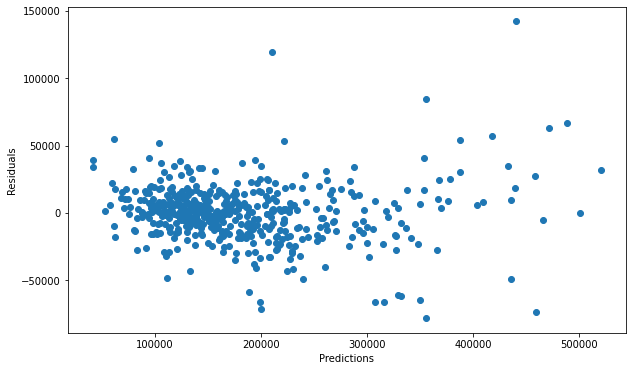

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(prediction,residuals_elastic);
plt.xlabel('Predictions')
plt.ylabel('Residuals');

Predictions seems more accurate for lower price sales below $300,000. Do note of this limitation for the model.

## Kaggle Submission

In [121]:
# Using Elastic Reg
prediction_submission = elastic.predict(X_submission)
prediction_submission.shape

(879,)

In [122]:
submission = pd.DataFrame(
    prediction_submission,
    columns= ["SalePrice"], 
    index = housing_test['Id']
)
submission.head()

SalePrice
Id                 
2658  147656.734988
2718  146256.449220
2414  223586.940764
1989  102966.981347
625   172230.224309

In [123]:
submission.shape

(879, 1)

In [124]:
# Export to csv
submission.to_csv("../datasets/submission.csv")